In [17]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Show first few rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

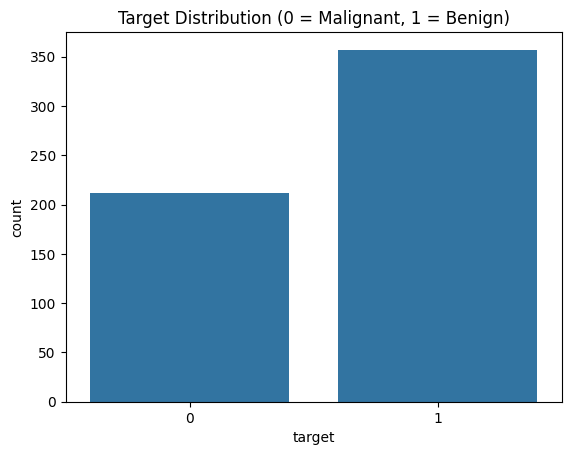

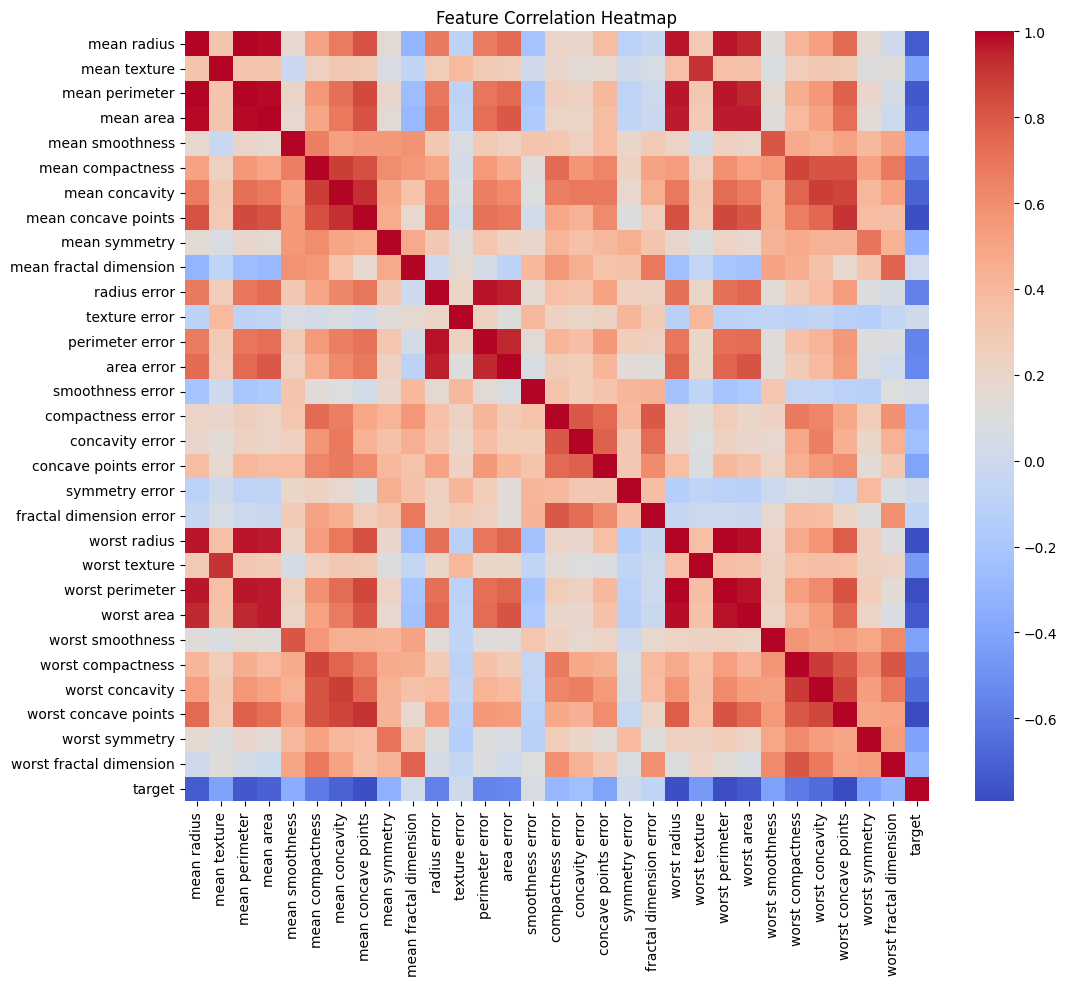

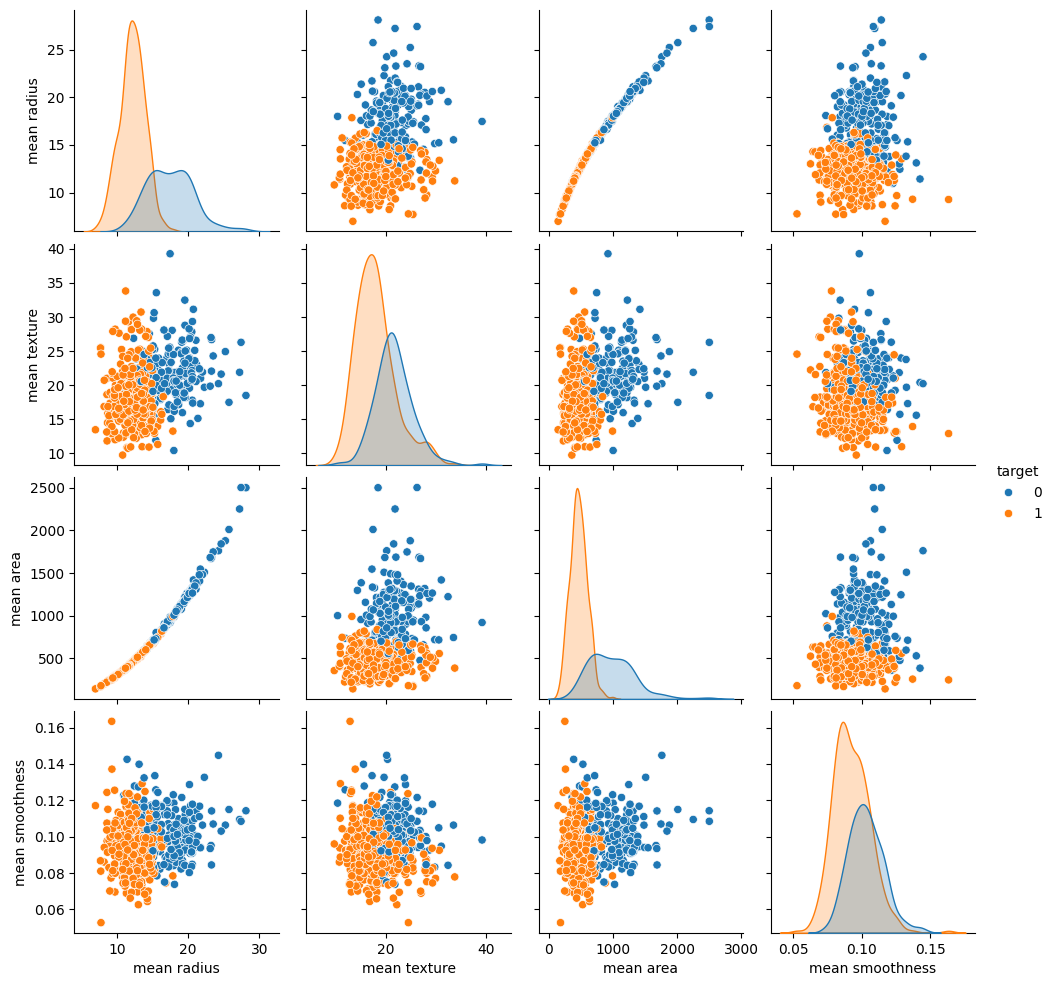

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check basic info
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Target distribution
sns.countplot(x='target', data=df)
plt.title("Target Distribution (0 = Malignant, 1 = Benign)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot for a few features
sns.pairplot(df[['mean radius', 'mean texture', 'mean area', 'mean smoothness', 'target']], hue='target')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Split features and labels
X = df.drop('target', axis=1)
y = df['target']

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Classifier": SVC()
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))



Logistic Regression
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Random Forest
Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Decision Tree
Accuracy: 0.9385964912280702
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.96      0.94      0.95        71

    accuracy                           0.94 

| Model                     | Accuracy | Precision | Recall  | F1-Score|
|--------------------------|----------|-----------------------|-------------------|---------------------|
| Logistic Regression      | 0.9737   | 0.97                  | 0.97              | 0.97                |
| Random Forest            | 0.9649   | 0.97                  | 0.96              | 0.96                |
| Decision Tree            | 0.9386   | 0.94                  | 0.94              | 0.94                |
| Support Vector Classifier| **0.9825** | **0.98**              | **0.98**          | **0.98**            |


C:\Users\user\AppData\Local\Temp\ipykernel_12532\1924440274.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


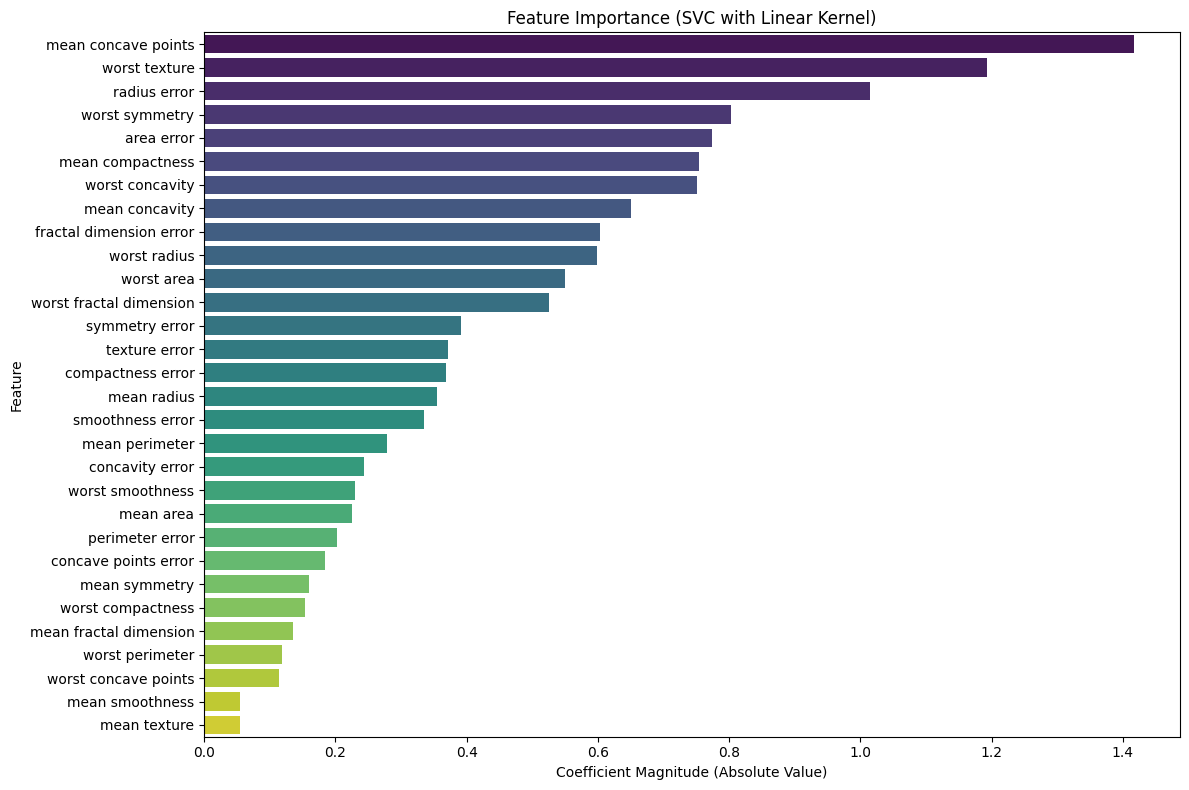

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Train SVC with linear kernel
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# Get feature importances from coefficients
feature_importance = np.abs(svc.coef_[0])
feature_names = data.feature_names

# Create DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance (SVC with Linear Kernel)")
plt.xlabel("Coefficient Magnitude (Absolute Value)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [8]:
import joblib
from sklearn.pipeline import make_pipeline

# Top 10 features based on importance
top_features = [
    'mean concave points',
    'worst texture',
    'radius error',
    'worst symmetry',
    'area error',
    'mean compactness',
    'worst concavity',
    'mean concavity',
    'fractal dimension error',
    'worst radius'
]

# Filter the dataset with top features
X_top = df[top_features]
y = df['target']

# Train-test split
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Create pipeline with scaler + SVC
svc_model = make_pipeline(StandardScaler(), SVC(kernel='linear'))

# Fit model
svc_model.fit(X_train_top, y_train)

# Save the trained model to a .pkl file
joblib.dump(svc_model, 'svc_top_features_model.pkl')

print("Model trained and saved as 'svc_top_features_model.pkl'")


Model trained and saved as 'svc_top_features_model.pkl'


In [19]:
top_features = [
    'mean concave points',
    'worst texture',
    'radius error',
    'worst symmetry',
    'area error',
    'mean compactness',
    'worst concavity',
    'mean concavity',
    'fractal dimension error',
    'worst radius', 
    'target'
]

df[top_features].tail()

,mean concave points,worst texture,radius error,worst symmetry,area error,mean compactness,worst concavity,mean concavity,fractal dimension error,worst radius,target
564,0.13890,26.40,1.1760,0.2060,158.70,0.11590,0.4107,0.24390,0.004239,25.450,0
565,0.09791,38.25,0.7655,0.2572,99.04,0.10340,0.3215,0.14400,0.002498,23.690,0
566,0.05302,34.12,0.4564,0.2218,48.55,0.10230,0.3403,0.09251,0.003892,18.980,0
567,0.15200,39.42,0.7260,0.4087,86.22,0.27700,0.9387,0.35140,0.006185,25.740,0
568,0.00000,30.37,0.3857,0.2871,19.15,0.04362,0.0000,0.00000,0.002783,9.456,1


# Clustering on Breast Cancer dataset

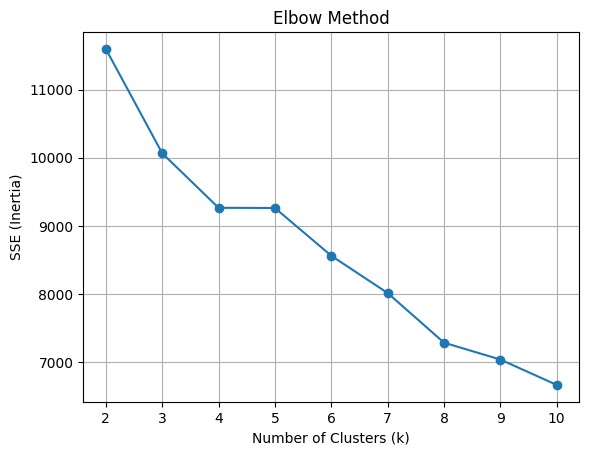

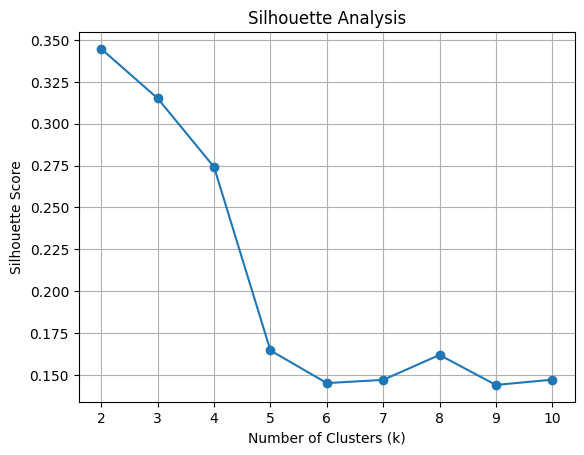

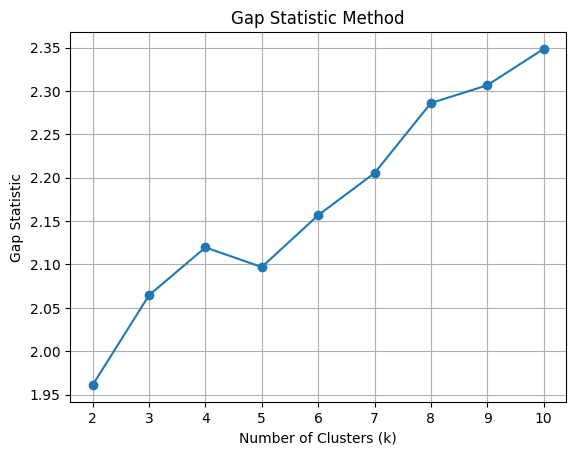

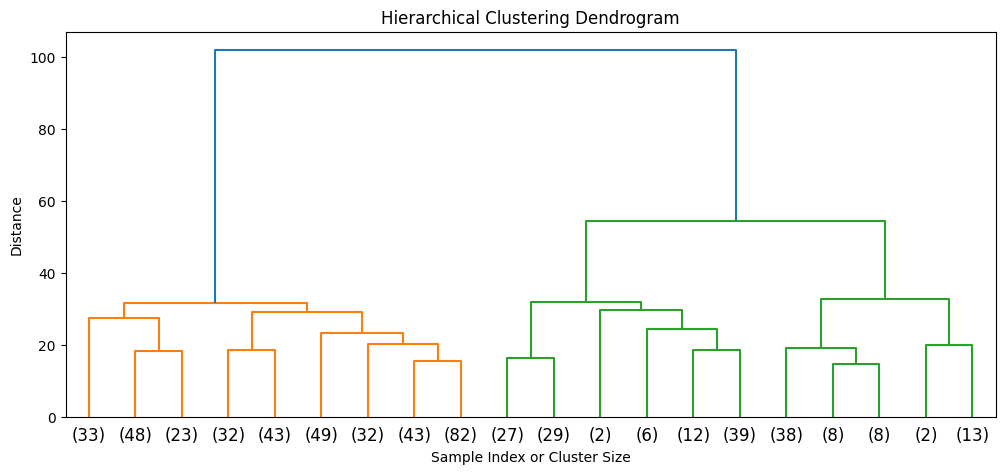


--- Clustering Evaluation Metrics ---

KMeans
Silhouette Score:        0.3447
Davies-Bouldin Score:    1.3093
Calinski-Harabasz Score: 267.6804
Adjusted Rand Index:     0.6765

Agglomerative
Silhouette Score:        0.3394
Davies-Bouldin Score:    1.3700
Calinski-Harabasz Score: 248.6288
Adjusted Rand Index:     0.5750

DBSCAN
Silhouette Score:        -0.1985
Davies-Bouldin Score:    2.2306
Calinski-Harabasz Score: 22.2553
Adjusted Rand Index:     0.0964


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import (
    silhouette_score, 
    davies_bouldin_score, 
    calinski_harabasz_score,
    adjusted_rand_score
)
from scipy.cluster.hierarchy import dendrogram, linkage

# Load and prepare dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y_true = data.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Elbow Method ---
sse = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure()
plt.plot(K_range, sse, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

# --- Silhouette Analysis ---
sil_scores = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

plt.figure()
plt.plot(K_range, sil_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.grid(True)
plt.show()

# --- Gap Statistic (custom implementation) ---
def gap_statistic(X, refs=None, n_refs=10, max_clusters=10):
    import numpy as np
    from sklearn.cluster import KMeans

    shape = X.shape
    if refs is None:
        tops = X.max(axis=0)
        bottoms = X.min(axis=0)
        dists = np.matrix(np.diag(tops - bottoms))

        refs = np.random.random_sample(size=(n_refs, shape[0], shape[1]))
        for i in range(n_refs):
            refs[i] = refs[i] * dists + bottoms

    gaps = np.zeros((max_clusters-1,))
    for k in range(1, max_clusters):
        km = KMeans(n_clusters=k+1, random_state=42)
        km.fit(X)
        orig_disp = np.log(km.inertia_)

        ref_disps = np.zeros(n_refs)
        for i in range(n_refs):
            km.fit(refs[i])
            ref_disps[i] = np.log(km.inertia_)

        gap = np.mean(ref_disps) - orig_disp
        gaps[k-1] = gap

    return gaps

gaps = gap_statistic(X_scaled, n_refs=10, max_clusters=10)
plt.figure()
plt.plot(range(2, 11), gaps, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Gap Statistic")
plt.title("Gap Statistic Method")
plt.grid(True)
plt.show()

# --- Hierarchical Clustering Dendrogram ---
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 5))
dendrogram(linked, truncate_mode='lastp', p=20)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance")
plt.show()

# Assuming k=2 (based on breast cancer labels and silhouette)
k_opt = 2

# --- Clustering Models ---
clustering_models = {
    "KMeans": KMeans(n_clusters=k_opt, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=k_opt),
    "DBSCAN": DBSCAN(eps=2, min_samples=5)
}

# --- Evaluate and Compare ---
print("\n--- Clustering Evaluation Metrics ---")
for name, model in clustering_models.items():
    labels = model.fit_predict(X_scaled)

    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    ch = calinski_harabasz_score(X_scaled, labels)
    ari = adjusted_rand_score(y_true, labels)

    print(f"\n{name}")
    print(f"Silhouette Score:        {sil:.4f}")
    print(f"Davies-Bouldin Score:    {db:.4f}")
    print(f"Calinski-Harabasz Score: {ch:.4f}")
    print(f"Adjusted Rand Index:     {ari:.4f}")
